In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Terms

| Name | English | Symbol | Description |
|:-----|:--------|:-------|:------------|
| 유의수준 | Significance Level | $ \alpha $ | 보통 0.05 (5%), 귀무가설이 기각될 확률 |
| 유의확률 | Significance probability | p-value | |


# Hypothesis Test

## 귀무가설과 대립가설 


* **Null Hypothesis $ H_0 $ (귀무가설)**
  - sampling에서는 sample observations은 단순히 우연히 일어난 것이라고 가정함
  - 두집단을 비교시 같거나 차이가 없다로 해석을 한다
  - 기본적으로는 참으로 추정되며, 거부하기 위해서는 증거가 필요하다
  
  
* **Alternative Hypothesis $ H_1 $ or $ H_a $ (대립가설)** 
  - sampling에서는 sample observations은 우연히 일어난 것이 아니라고 가정함
  - 두집단을 비교시 차이가 있다고 가정을 한다


## 단측 및 양측 검정 


* **Two-Tailed Test 양측 검정 -> <span style="color:red">다르냐?</span>**
  - 모집단의 모수가 귀무 가설에서의 값보다 **크거나 작은지를 판단**하려면 `양측 대립 가설` 을 사용
  - 특정 고등학교의 시험 결과가 국가 평균(72점)과 `다른지` 여부를 판단하려고 함 <br>귀무가설은 $ H_0: \mu = 72 $ 이고, 대립가설은 $ H_1: \mu \ne 72 $ <br> 국가 평균과 `다른지`를 판단하는 것이기 때문에 양측 검정이다. (더 높을수도 더 낮을 수도 있다) 
  
  
* **One-Tailed Test 단측 검정 -> <span style="color:red">보다 크냐 또는 보다 작냐?</span>**
  - 특정 방향으로 모집단 모수가 귀무가설에서의 값과 다른지 여부를 확인하려면 `단측 대립 가설`을 사용 
  - 특정 고등학교의 시험 결과가 국가 평균(72점)보다 더 높은지를 판단하려고 함 <br>귀무가설은 $ H_0: \mu = 72 $ 이고, 대립가설은 $ H_1: \mu > 72 $ <br>국가 평균보다 `높은지`를 판단하는 것이기 때문에 단측 검정을 한다 
  




## 제 1종 오류 VS 제 2종 오류

| Decision                    | $ H_0 $ is True (귀무가설 참)  | $ H_0 $ is not True (귀무가설 거짓) |
|:----------------------------|:-----------------------------|:---------------------------------|
| Accept $ H_0 $ (귀무가설 채택) | Correct (No Error) <br>$ p = 1 - \alpha $          | Type 2 Error ($ p = \beta $) <br>2종 오류 |
| Reject $ H_0 $ (귀무가설 기각) | Type 1 Error ($ p = \alpha $) <br> 1종 오류 | Correct (No Error) <br> $ p = 1 - \beta $ |



### 제 1종 오류 (False Positive)

**<span style="color:red">1종 오류는 귀무가설이 참인데 기각되었을때 발생합니다.</span>**<br>

$$ \alpha = P(\text{type 1 error}) = P(\text{reject } H_0 | H_0 \text{ is true} )$$ 

 - 양치기 소년에서 귀무가설은 "늑대가 없다" 입니다. <br>실제로 늑대가 없는 상황에서 늑대가 있다고 잘못된 알람 (False Alarm)을 준 경우 발생합니다.
 - 법정에서의 귀무가설은 피고인이 죄가 없다입니다. <br>이때 죄가 있다고 판결이 난경우 귀무가설은 기각되었고, 잘못된 판결이 내려 졌습니다.
 - **1종 오류가 발생할 확률을 "유의수준 (significance level)"  이라고 합니다.**


### 제 2종 오류 (False Negative)

**<span style="color:red">2종 오류는 귀무가설이 거짓인데, 기각시키지 못했을때 발생합니다.</span>** <br>

$$ \beta = P(\text{type 2 error}) = P(\text{accept } H_0 | H_0 \text{ is false}) $$

 - 양치기 소년에서 귀무가설은 "늑대가 없다" 입니다. 이때 실제로는 늑대가 있는 케이스 입니다. <br>그리고 양치기 소년은 늑대가 없다고 말하고 (귀무가설이 맞다!) 다른데 놀러간 케이스라고 할 수 있습니다.
 - 바이러스 백신을 만들었습니다. 귀무가설은 바이러스 백신은 효과가 없다 입니다.<br>이때 실제로는 백신이 효과가 있는데도 불구하고 잘못된 판단으로 효과가 없다고 했을때 (귀무가설을 인정) 많은 사람들을 살릴수 있었음에도 불구하고 인명피해를 내놓은 상황일수 있습니다. 


### 적절한 유의수준과 검정력을 선택 

예를 들어 2개의 약품이 있었고 다음과 같은 1종 오류 또는 2종 오류를 범할 수 있습니다. 

- 1종 오류: 두개의 약의 효과는 동일하다는 결론 (사실은 다르다) -> 틀려도 기존 제품을 먹으니 크게 문제는 없으나.. 더 좋은 약을 놓치게 되는 경우 문제가 생길수 있다
- 2종 오류: 두개의 약이 효과가 다르다는 결론 (사실은 동일하다) 



### 알파와 베타를 동시에 줄이는건 불가능

![](images/hypothesis-test-error.png)

위의 그림에서 보듯이, $ \alpha $ 와 $ \beta $ 를 모두 줄일수는 없습니다.<br>
검사의 신뢰도를 높이기 위해서 임계값을 높여서 (ex. 0.05 -> 0.03) $ \alpha $ 의 범위를 줄이게 되면, <br>
동시에 $ \beta $ 의 범위는 높아지게 됩니다.

**즉, $ \alpha $ 와 $ \beta $ 는 서로 상반된 크기를 갖습니다.**


## P-Value

P-value (또는 유의 확률 - significance probability)는 바로 **1종 오류가 일어날 확률**을 의미하고, 일반적으로 5%로 제약을 합니다. (p-value < 0.05)<br>
**귀무가설이 맞다고 가정을 할때, 관측된 값보다 극단적인 결과가 실제로 관측될 확률입니다.**<br>

예를 들어, 유의수준이 0.05이고, p < 0.03 이라고 할때, <br>
100번의 실험중에 97번의 실험이 연구자의 가설대로 재현이 되었고, 3번째 예외적 경우가 있었다 라고 해석할수 있습니다. 


2가지 방식으로 귀무가설을 검증할수 있습니다. <br>
먼저 critical value 를 ppf함수를 사용해서 검정한는 방법은 다음과 같습니다.

* **if abs(statistic) <= critical value**: 귀무가설을 채택하며, 평균값을 동일하다
* **if abs(statistic) > critical value**: 귀무가설을 기각하며, 평균은 서로 다르다

Cumulative distribution function (CDF)를 사용해서 p-value를 구한다음, 유의 수준 $ \alpha $와 비교할수도 있습니다. 

* **if p-value > alpha**: 귀무가설을 채택하며, 평균값을 동일하다
* **if p-value <= alpha**: 귀무가설을 기각하며, 평균값은 서로 다르다 

# Normality Test

- 현실에서는 바빠서 대충 t-test돌리고 하지만, 사실 통계라는 것은 상당히 많은 제약사항들이 붙어 있습니다. <br> `이때 데이터는 정규분포를 따라야 한다` 와 같은 문장이 있다면 정규성 검증을 통해서 정규분포를 따르는지 먼저 체크를 해줘야 합니다.

- 예를 들어 **T-test, ANOVA 처럼 모수적 검정방법은 일반적으로 분포가 정규분포를 따른다고 가정**을 합니다. <br>표본의 크기가 30개 이상이 되면 중심극한 정리에 의해서 정규성을 갖고 있다고 가정을 할수 있지만, <br>**30개 미만인 경우에는 정규성 검정을 먼저 수행해야 합니다.**
3- 사실 실무에서는 데이터가 대부분 빅데이터라, 이런거 잘 안합니다.
- 즉, 표본의 갯수가 10개~30개라면, 정규성 검정이 반드시 필요합니다. <br>정규성 검정을 통과하면 모수적 검정을 사용해도 되지만, 실패하면 비모수적 검정을 사용해야 합니다. 
- 만약 표본의 갯수가 30개 이상이라면, 그냥 모수적 검정을 사용해도 됩니다.

## Normal Quantile-Quantile Plot

 - 분위수-분위수 그래프 
 - 정규분포를 따를 경우 일직선으로 나온다

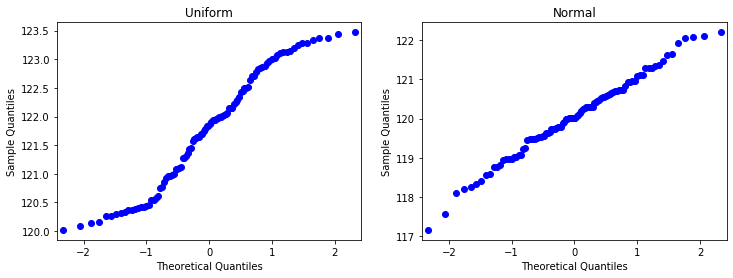

In [2]:
import statsmodels.api as sm

uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

fig, plots = subplots(1, 2, figsize=(12, 4))
g1 = sm.qqplot(uniform, ax=plots[0])
g2 = sm.qqplot(normal, ax=plots[1])
plots[0].title.set_text('Uniform')
plots[1].title.set_text('Normal')
plt.show()


## Histogram

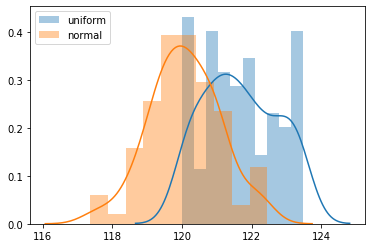

In [3]:
uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

sns.distplot(uniform, bins=10, label='uniform')
sns.distplot(normal, bins=10, label='normal')
legend()

## Shapiro-Wilks Test

 - 샤피로 윌크 검정
 - 각 샘플안의 관측치는 독립 동일 분포를 따른다 (independetn and identically distributed - iid)
 - 표본수가 약 50개 이상 2000개 미만인 데이터셋에 적합 (2000개 이상인 경우 Kolmogorov-Smirnova test 사용)
 - 샤피로는 꽤 보수적이기 때문에 히스토그램, 분위수 그래프 함께 사용 권장
 - $ H_0 $ : 귀무가설은 정규분포를 따른다
 - P-value 가 0.05보다 높다면 정규분포를 따른다고 가정한다 (이후 t-test 가능)


uniform data | 통계치: 0.94 | p-value:0.00025 | 정규분포?: False
normal data  | 통계치: 0.99 | p-value:0.57064 | 정규분포?: True


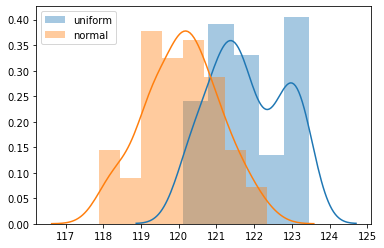

In [4]:
from scipy.stats import shapiro
 
uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

stat1, p1 = shapiro(uniform)
stat2, p2 = shapiro(normal)

print(f'uniform data | 통계치: {stat1:.2f} | p-value:{p1:.5f} | 정규분포?: {p1 > 0.05}')
print(f'normal data  | 통계치: {stat2:.2f} | p-value:{p2:.5f} | 정규분포?: {p2 > 0.05}')

sns.distplot(uniform, label='uniform')
sns.distplot(normal, label='normal')
legend()

## D'Agostino's K^2 Test
 
 - 디아고스티노 검정 
 - 각 샘플안의 관측치는 독립 동일 분포를 따른다 (independetn and identically distributed - iid)
 - $ H_0 $: 귀무가설은 정규분포를 따른다
 - $ H_1 $: 대립가설은 정규분포를 따르지 않는다

In [5]:
from scipy.stats import normaltest

uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

stat1, p1 = normaltest(uniform)
stat2, p2 = normaltest(normal)

print(f'uniform data | 통계치: {stat1:.2f} | p-value:{p1:.5f} | 정규분포?: {p1 > 0.05}')
print(f'normal data  | 통계치: {stat2:.2f} | p-value:{p2:.5f} | 정규분포?: {p2 > 0.05}')

uniform data | 통계치: 33.17 | p-value:0.00000 | 정규분포?: False
normal data  | 통계치: 0.31 | p-value:0.85717 | 정규분포?: True


## Anderson-Darling Test

 - 각 샘플안의 관측치는 독립 동일 분포를 따른다 (independetn and identically distributed - iid)
 - $ H_0 $: 귀무가설은 정규분포를 따른다
 - $ H_1 $: 대립가설은 정규분포를 따르지 않는다

In [6]:
from scipy.stats import anderson

uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

r1 = anderson(uniform)
r2 = anderson(normal)

print(f'[r1] statistic:{r1.statistic:5.2f} | significance_level: {r1.significance_level}')
print(f'[r2] statistic:{r2.statistic:5.2f} | significance_level: {r2.significance_level}')

[r1] statistic: 1.66 | significance_level: [15.  10.   5.   2.5  1. ]
[r2] statistic: 0.49 | significance_level: [15.  10.   5.   2.5  1. ]


# Parametric Test

1. 표본의 갯수가 30개 이상이면 parametric test (모수적 검정)을 하면 됩니다. 
2. 표본의 갯수가 10개이상 30개 미만이면서, 정규성 검정을 통과한다면 모수적 검정을 사용할수 있습니다. (실패하면 비모수적 검정사용)
3. 표본의 갯수가 10개미만이라면 non-parametric test (비모수적 검정)을 진행합니다.

## T-Test


- 모집단의 표준편차 $ \sigma $ 를 모를때 사용. (표준오차 $ \frac{s}{\sqrt{n}} $ 를  대신 사용)
- 2개의 집단에 대한 평균의 차이를 검정한다 (3개 이상인 경우 ANOVA 검정을 한다) 
- 종속 변수는 continuous variable이어야 한다. 
- 관측치는 모두 독립적이어야 한다
- outlier 제거 필수

## One-Sample T-Test 

- 단일표본 T 검정
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지 검정한다 <br>(사실 여기서 모집단은 어떤 값과 비교한다고 생각해도 된다 - ex. 전년도 판매 평균가와 금년도 판매 평균가)
- $ H_0: u_0 = u_1 $ : 귀무가설은 두 그룹의 평균의 차이는 없다
- $ H_1 $ : 대립가설은 one-tail 이냐 또는 two-tail 이냐에 따라서 달라집니다. 
  - one-tail: $ H_1: u_0 > u_1 $ 또는 $ H_1: u_0 < u_1 $
  - two-tail: $ H_1: u_0 \ne u_1 $
 
공식은 아래와 같습니다. 

$$ t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} $$


degrees of freedom은 다음과 같습니다. 

$$ \text{df} = n-1  $$



### Scipy

scipy에서는 [ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html) 함수를 사용할 수 있습니다. <br>
다만 ttest_1samp 함수는 two-tailed test입니다. <br>
따라서 one-tailed test를 사용하기 위해서는 p-value값을 2로 나눠줘야 합니다. 

> **scipy.stats.ttest_1samp**<br>
> This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.


In [90]:
from scipy.stats import ttest_1samp
np.random.seed(0)

# Population mean: 100
# 아래는 samples들
sample1 = np.random.normal(loc=98, scale=10, size=500)
sample2 = np.random.normal(loc=99, scale=10, size=500)
sample3 = np.random.normal(loc=100, scale=10, size=500)
sample4 = np.random.normal(loc=101, scale=10, size=500)
sample5 = np.random.normal(loc=102, scale=10, size=500)

# ttest_1samp 는 two-tailed t-test를 진행한다
# 나중에 pvalue/2 를 해줘서 -> one-tailed t-test로 만들어야 한다
t1 = ttest_1samp(sample1, 100)
t2 = ttest_1samp(sample2, 100)
t3 = ttest_1samp(sample3, 100)
t4 = ttest_1samp(sample4, 100)
t5 = ttest_1samp(sample5, 100)


# Visualization
data = [[100, sample1.mean(), sample1.std(), t1.statistic, t1.pvalue/2,],
        [100, sample2.mean(), sample2.std(), t2.statistic, t2.pvalue/2],
        [100, sample3.mean(), sample3.std(), t3.statistic, t3.pvalue/2],
        [100, sample4.mean(), sample4.std(), t4.statistic, t4.pvalue/2],
        [100, sample5.mean(), sample5.std(), t5.statistic, t5.pvalue/2]]

data = pd.DataFrame(data, columns=['p_mean', 's_mean', 's_std', 't-statistic', 'p-value'])
data['less_than'] = data.apply(lambda c: (c['p-value'] < 0.05) & (c['t-statistic'] < 0), axis=1)
data['more_than'] = data.apply(lambda c: (c['p-value'] < 0.05) & (c['t-statistic'] > 0), axis=1)
data['reject_H0'] = data.apply(lambda c: (c['p-value'] < 0.05) , axis=1)
data = data.round(6)
data

,p_mean,s_mean,s_std,t-statistic,p-value,less_than,more_than,reject_H0
0,100,97.746456,9.981568,-5.043333,0.000000,True,False,True
1,100,98.348410,9.753767,-3.782510,0.000087,True,False,True
2,100,100.291970,9.651692,0.675749,0.249757,False,False,False
3,100,100.980369,9.708915,2.255636,0.012263,False,True,True
4,100,101.706063,9.678066,3.937829,0.000047,False,True,True


### 직접 만들어서 사용

In [114]:
from scipy.stats import t


def my_ttest_1sample(x, population_mean, alpha=0.05):
    # Set degrees of freedom
    df = len(x) - 1

    # Calculate Standard Error
    std_error = np.std(x)/np.sqrt(df)
    t_statistic = (x.mean() - population_mean)/std_error

    # Find critical value
    critical_value = t.ppf(1.0 - alpha, df)

    # Calculate p-value
    p_value = (1 - t.cdf(abs(t_statistic), df))

    return x.mean(), std_error, t_statistic, critical_value, p_value


# Population mean: 100
t1 = my_ttest_1sample(sample1, 100)
t2 = my_ttest_1sample(sample2, 100)
t3 = my_ttest_1sample(sample3, 100)
t4 = my_ttest_1sample(sample4, 100)
t5 = my_ttest_1sample(sample5, 100)


# Visualization
df = pd.DataFrame(np.array([t1, t2, t3, t4, t5]),
                  columns=['sample_mean', 'std_err', 't-statistic', 'critical-value', 'p-value'])
df['less_than'] = df.apply(lambda c: (c['p-value'] < 0.05) & (c['t-statistic'] < 0), axis=1)
df['more_than'] = df.apply(lambda c: (c['p-value'] < 0.05) & (c['t-statistic'] > 0), axis=1)
df['reject_H0_by_t'] = df.apply(lambda c: abs(c['t-statistic']) > c['critical-value'], axis=1)
df['reject_H0_by_p'] = df.apply(lambda c: c['p-value'] <= 0.05, axis=1)
df = df.round(6)
df

,sample_mean,std_err,t-statistic,critical-value,p-value,less_than,more_than,reject_H0_by_t,reject_H0_by_p
0,97.746456,0.446836,-5.043333,1.647913,0.000000,True,False,True,True
1,98.348410,0.436639,-3.782510,1.647913,0.000087,True,False,True,True
2,100.291970,0.432069,0.675749,1.647913,0.249757,False,False,False,False
3,100.980369,0.434631,2.255636,1.647913,0.012263,False,True,True,True
4,101.706063,0.433250,3.937829,1.647913,0.000047,False,True,True,True


## Two-Sample T-Test

* 각 샘플들은 독립적이다. (Independent)
* 정규성을 만족해야 함 (n > 30 일 경우 만족한다고 판단)
* 등분산성을 맍족해야 함


$$ \begin{align} t &= \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s^2_p \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}} \\
s^2_p &= \frac{(n_1-1) s^2_1 + (n_2-2)s^2_2}{n_1 + n_2 -2}
\end{align} $$

* $ s^2_p $: pooled variance
* $ n_1 + n_2 -2 $: degrees of freeddom

## Paired T-Test

$$ t = \frac{\bar{d}}{s/\sqrt{n}} $$